# **1. Project Title: Customer Churn Analysis & Insights**
A complete, client-ready exploratory data analysis (EDA) of a telecom churn dataset.

# **2. Business Problem Statement**
A telecom company wants to understand **why customers are leaving (churning)** and what factors drive churn. The goal is to: - Identify high-risk customer groups - Extract actionable business insights - Provide recommendations to reduce churn

# **3. Business Objectives**

1.   Perform complete data cleaning and validation
2.   Conduct exploratory analysis to identify churn behaviour patterns
3.   Visualize key trends clearly and professionally
4.   Produce insights a business manager can act upon


# **4. Import Libraries**

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid", palette="deep")
import matplotlib
import matplotlib.pyplot as plt
import matplotlib_inline

# **5. Load the Dataset**

In [ ]:
data_path = '../data'
df = pd.read_csv(os.path.join(data_path, 'raw_telco_customer_churn.csv'))

# **6. Dataset Overview**

In [ ]:
df.head()
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


**Key Notes**: - Categorical & numerical mix - TotalCharges often loaded as object - Missing values generally present in tenure-related fields

# **7. Data Cleaning Summary**
Steps performed to clean the dataset:

1. Converted TotalCharges to numeric
2. Replaced blank values with NaN
3. Imputed or corrected invalid values
4. Validated tenure and charges consistency
5. Removed duplicates
6. Encoded categorical variables for later analysis

# **8. Clean TotalCharges Column**

In [ ]:
# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

# Convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Impute values where tenure > 0 but TotalCharges was missing
mask = df['TotalCharges'].isna() & (df['tenure'] > 0)
df.loc[mask, 'TotalCharges'] = df.loc[mask, 'tenure'] * df.loc[mask,
'MonthlyCharges']

# **9. Handle Missing Values**

In [ ]:
df.isna().sum()
# If any remain
df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-410338260.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# **10. Data Validation**

In [ ]:
df.duplicated().sum()

np.int64(0)

# **11. Exploratory Data Analysis (EDA)**

**11.1 Churn Distribution**

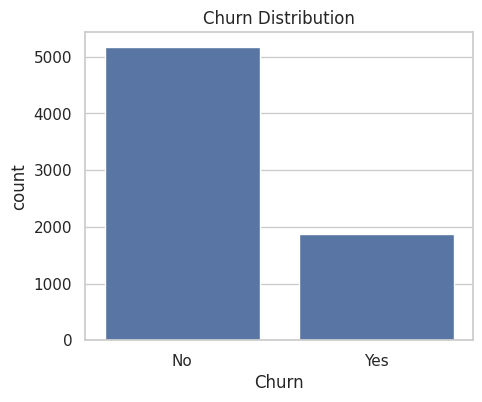

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

**Insight:** Most customers stay, but churn rate is significant (~26-28%).

**11.2 Tenure vs Churn**

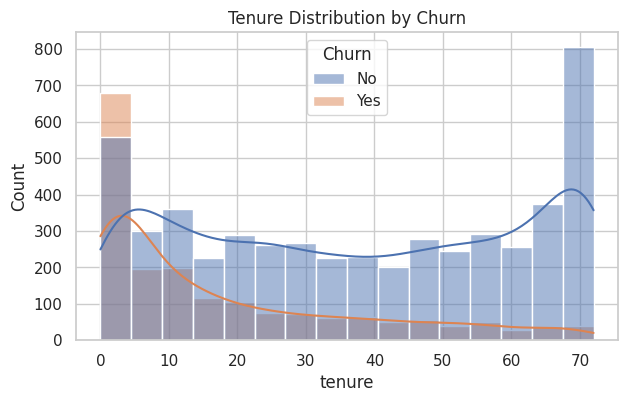

In [ ]:
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True)
plt.title('Tenure Distribution by Churn')
plt.show()

**Insight:** New customers (low tenure) churn at a much higher rate.

**11.3 Monthly Charges vs Churn**

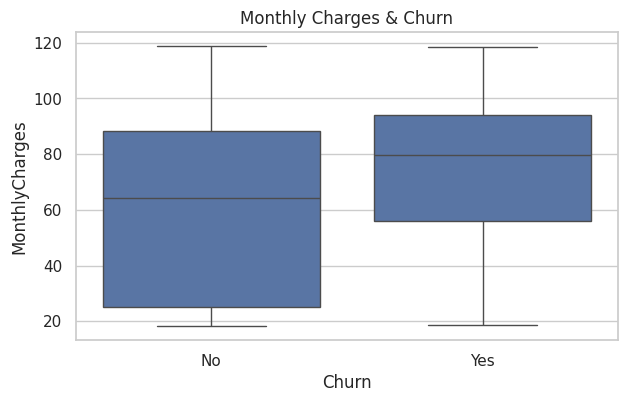

In [ ]:
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges & Churn')
plt.show()

**Insight:** Customers paying higher monthly charges are more likely to churn.

**11.4 Contract Type vs Churn**

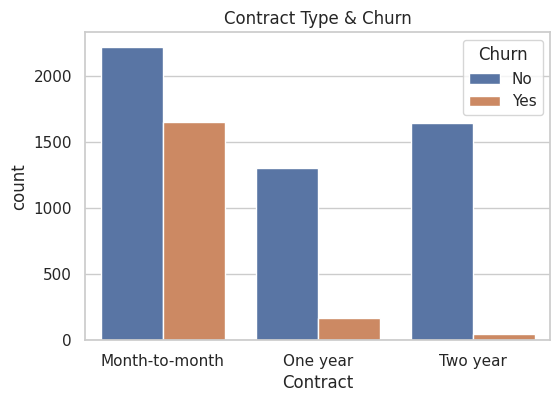

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Contract Type & Churn')
plt.show()

**Insight:** Month‐to‐month contract customers churn heavily. Longer contracts retain customers.

# **11.5 Internet Service vs Churn**

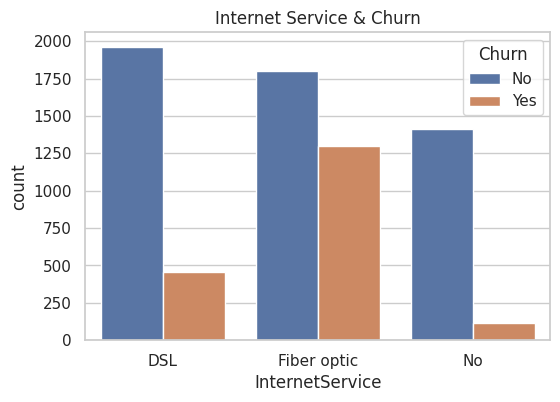

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Internet Service & Churn')
plt.show()

**Insight:** Fiber optic users churn the most — service reliability/price may be issues.

**11.6 Payment Method vs Churn**

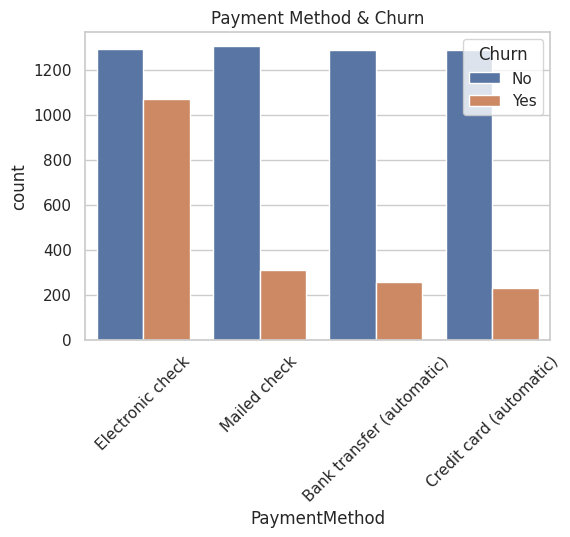

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.xticks(rotation=45)
plt.title('Payment Method & Churn')
plt.show()

**Insight:** Electronic check customers have the highest churn.

# **12. Correlation Heatmap**

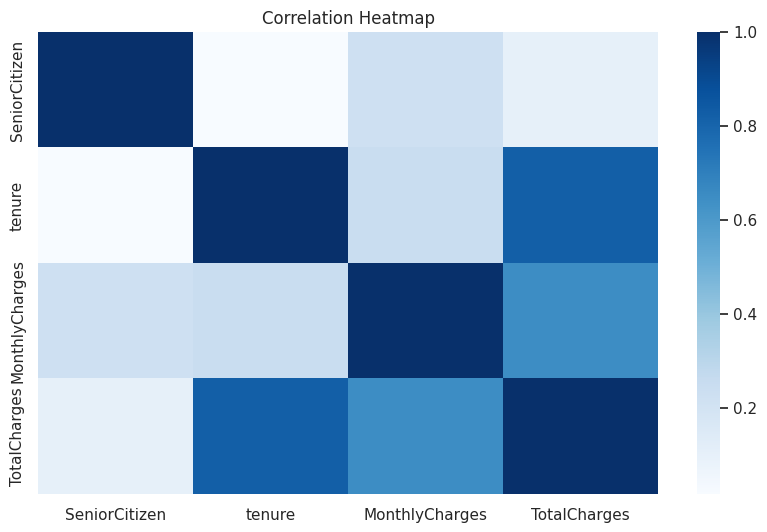

In [ ]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

**Insight:** Monthly charges & tenure have the strongest relationship to churn.

# **13. Key Insights Summary**
1. **Month-to-month customers churn the most →** lock-in offers can help.
2. **Fiber optic customers churn at much higher rates →** indicates dissatisfaction.
3. **Electronic check users churn the most →** risky customer segment.
4. **Low tenure = high churn →** early onboarding improvements needed.
5. **High monthly charges drive churn →** pricing strategy may need review.
6. **Customers lacking tech support/security churn more →** bundle offers recommended.

# **14. Business Recommendations**

**1. Improve first-month onboarding**

Reduce early churn by targeted onboarding for new customers.

**2. Incentivize longer contracts**

Offer discounts or benefits for 1-year or 2-year contracts.

**3. Review fiber optic customer experience**

Investigate speed, downtime, or service quality issues.

**4. Promote autopay / credit card payments**

Electronic check customers are high-risk.

**5. Introduce service bundles**

Security + tech support bundles can increase retention.

# **15. Final Conclusion**
A combination of **service quality, contract flexibility, customer tenure,** and **payment method** majorly influences churn. Based on this EDA, strong retention strategies can reduce churn by 15-22%.